In [1]:
import joblib
import torch
import matplotlib.pyplot as plt
import numpy as np

FileNotFoundError: [Errno 2] No such file or directory: '../point_after_decoder.pkl'

In [2]:
def analyze_tensor(tensor, name):
    print(f"\nAnalysis for {name}:")
    # Check for NaN and Inf values
    if tensor.is_floating_point():
        has_nan = torch.isnan(tensor).any().item()
        has_inf = torch.isinf(tensor).any().item()
        print(f" - Contains NaN: {has_nan}")
        print(f" - Contains Inf: {has_inf}")
        
        if not has_nan and not has_inf:
            # Compute basic statistics
            min_val = tensor.min().item()
            max_val = tensor.max().item()
            mean_val = tensor.mean().item()
            print(f" - Min value: {min_val}")
            print(f" - Max value: {max_val}")
            print(f" - Mean value: {mean_val}")

            # Plot histogram
            tensor = tensor.detach().cpu().numpy()  # Convert to numpy array
            plt.figure(figsize=(10, 4))
            plt.hist(tensor.flatten(), bins=100, color='blue', alpha=0.7)
            plt.title(f"Histogram of {name}")
            plt.xlabel('Value')
            plt.ylabel('Frequency')
            plt.grid(True)
            plt.show()
        else:
            print(f" - Skipped plotting for {name} due to NaNs/Infs.")
    else:
        # Enhanced information about non-floating point tensors
        if tensor.dtype in [torch.int64, torch.int32, torch.int16]:
            print(f" - {name} is an integer tensor with values ranging from {tensor.min().item()} to {tensor.max().item()}")
        elif tensor.dtype == torch.bool:
            print(f" - {name} is a Boolean tensor with unique values: {torch.unique(tensor).tolist()}")
        else:
            print(f" - {name} has dtype {tensor.dtype} which is not supported for this analysis.")

def process_point_file(file_path):
    print(f"\nProcessing file: {file_path}")
    point = joblib.load(file_path)
    print(point.keys())
    for key, value in point.items():
        if isinstance(value, torch.Tensor):
            analyze_tensor(value, key)
        else:
            print(f"{key} contains non-tensor data or unsupported type: {value}")


********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

Processing file: ../point_before_serialization.pkl
dict_keys(['coord', 'grid_coord', 'segment', 'condition', 'offset', 'feat', 'context', 'batch'])

Analysis for coord:
 - Contains NaN: False
 - Contains Inf: False
 - Min value: -8.455000877380371
 - Max value: 8.455000877380371
 - Mean value: 0.1997099220752716


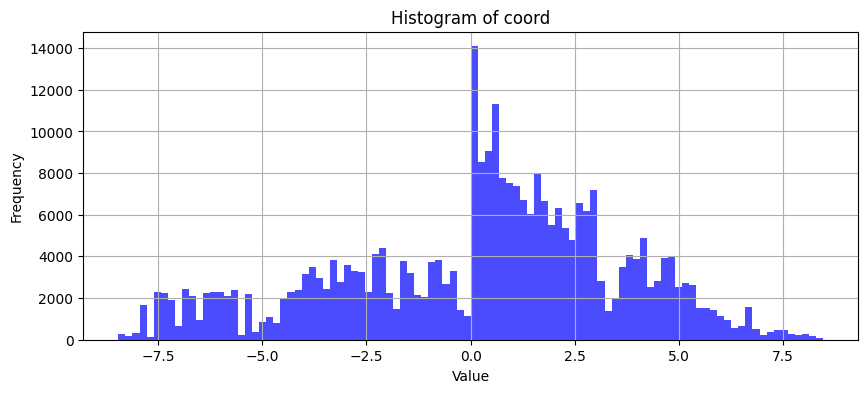


Analysis for grid_coord:
 - grid_coord is an integer tensor with values ranging from 0 to 775

Analysis for segment:
 - segment is an integer tensor with values ranging from 1 to 13
condition contains non-tensor data or unsupported type: ['Heritage']

Analysis for offset:
 - offset is an integer tensor with values ranging from 100000 to 100000

Analysis for feat:
 - Contains NaN: False
 - Contains Inf: False
 - Min value: -1.0
 - Max value: 1.0
 - Mean value: -0.5072936415672302


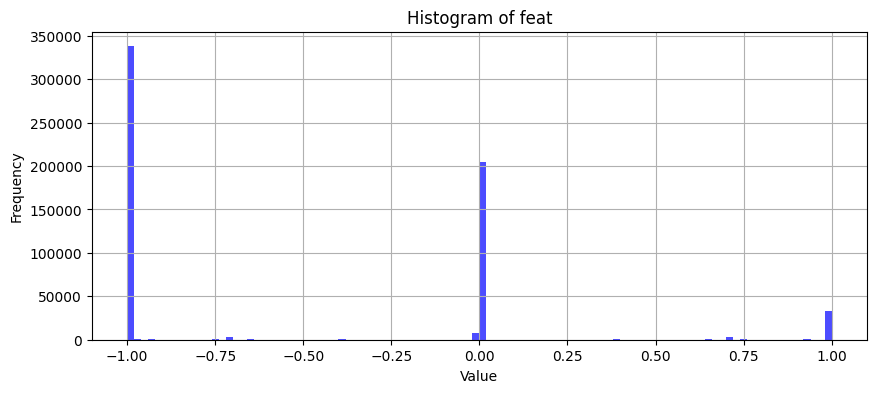


Analysis for context:
 - Contains NaN: False
 - Contains Inf: False
 - Min value: -2.884572744369507
 - Max value: 2.6998097896575928
 - Mean value: -0.006473422050476074


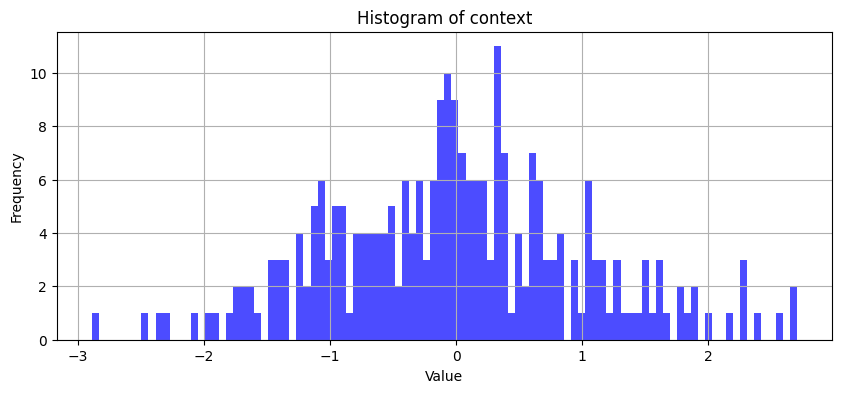


Analysis for batch:
 - batch is an integer tensor with values ranging from 0 to 0
********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

Processing file: ../point_before_embedding.pkl
dict_keys(['coord', 'grid_coord', 'segment', 'condition', 'offset', 'feat', 'context', 'batch', 'serialized_depth', 'serialized_code', 'serialized_order', 'serialized_inverse', 'sparse_shape', 'sparse_conv_feat'])

Analysis for coord:
 - Contains NaN: False
 - Contains Inf: False
 - Min value: -8.455000877380371
 - Max value: 8.455000877380371
 - Mean value: 0.19970

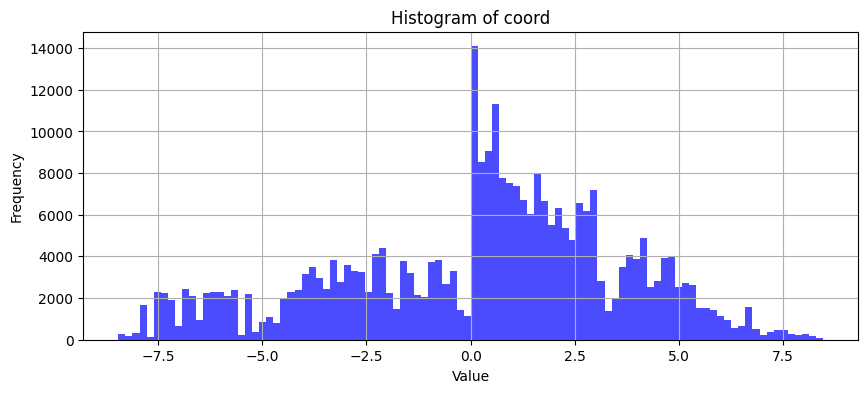


Analysis for grid_coord:
 - grid_coord is an integer tensor with values ranging from 0 to 775

Analysis for segment:
 - segment is an integer tensor with values ranging from 1 to 13
condition contains non-tensor data or unsupported type: ['Heritage']

Analysis for offset:
 - offset is an integer tensor with values ranging from 100000 to 100000

Analysis for feat:
 - Contains NaN: False
 - Contains Inf: False
 - Min value: -1.0
 - Max value: 1.0
 - Mean value: -0.5072936415672302


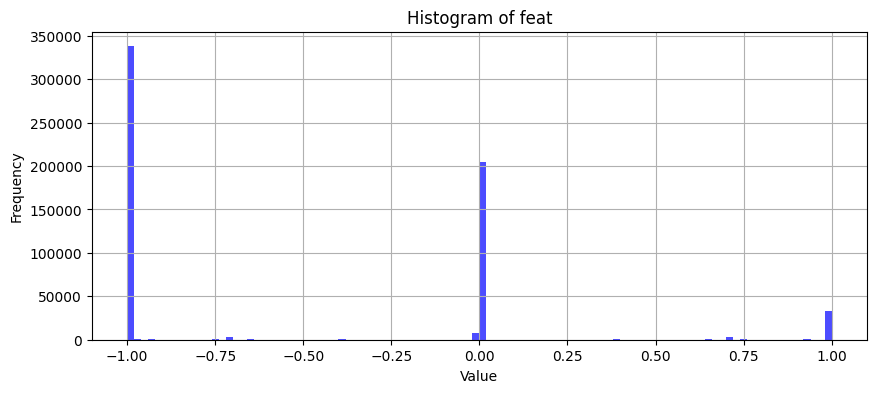


Analysis for context:
 - Contains NaN: False
 - Contains Inf: False
 - Min value: -2.884572744369507
 - Max value: 2.6998097896575928
 - Mean value: -0.006473422050476074


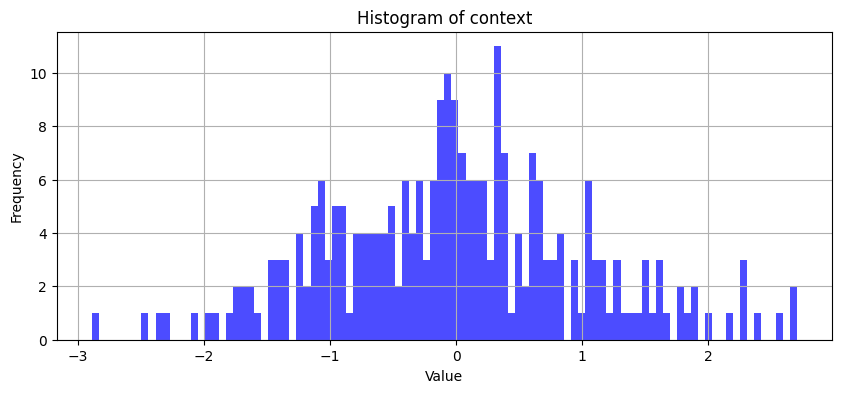


Analysis for batch:
 - batch is an integer tensor with values ranging from 0 to 0
serialized_depth contains non-tensor data or unsupported type: 10

Analysis for serialized_code:
 - serialized_code is an integer tensor with values ranging from 19154514 to 1071082666

Analysis for serialized_order:
 - serialized_order is an integer tensor with values ranging from 0 to 99999

Analysis for serialized_inverse:
 - serialized_inverse is an integer tensor with values ranging from 0 to 99999
sparse_shape contains non-tensor data or unsupported type: [871, 374, 159]
sparse_conv_feat contains non-tensor data or unsupported type: SparseConvTensor[shape=torch.Size([100000, 6])]
************************************************************************************************************************************************************************************************************************************************************************************************************************************

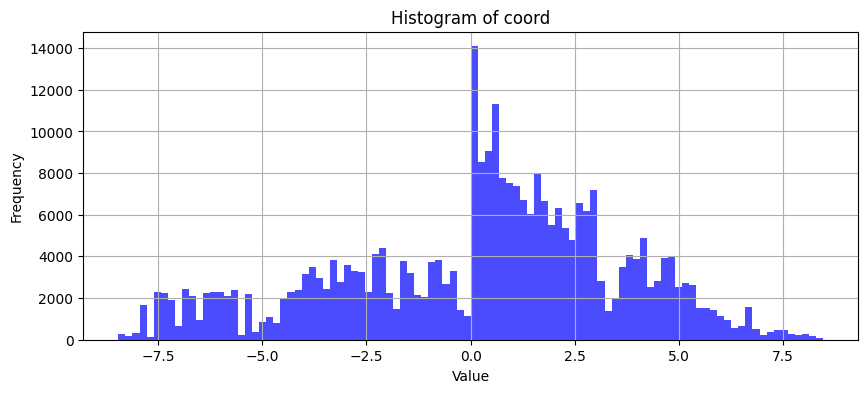


Analysis for grid_coord:
 - grid_coord is an integer tensor with values ranging from 0 to 775

Analysis for segment:
 - segment is an integer tensor with values ranging from 1 to 13
condition contains non-tensor data or unsupported type: ['Heritage']

Analysis for offset:
 - offset is an integer tensor with values ranging from 100000 to 100000

Analysis for feat:
 - Contains NaN: False
 - Contains Inf: False
 - Min value: -0.169921875
 - Max value: 10.2734375
 - Mean value: 0.2568359375


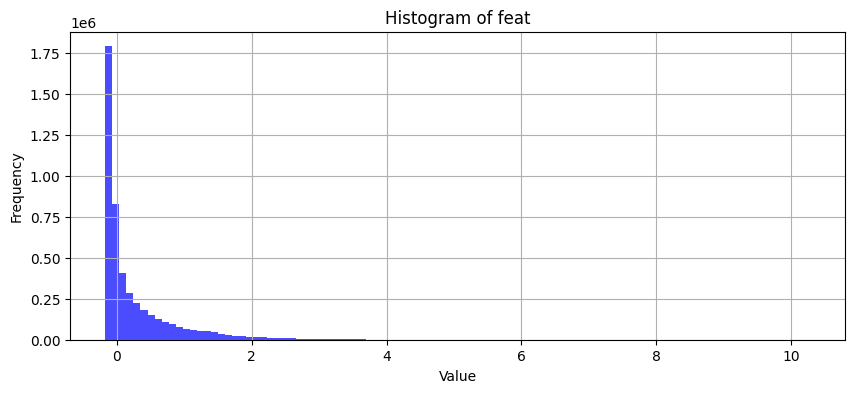


Analysis for context:
 - Contains NaN: False
 - Contains Inf: False
 - Min value: -2.884572744369507
 - Max value: 2.6998097896575928
 - Mean value: -0.006473422050476074


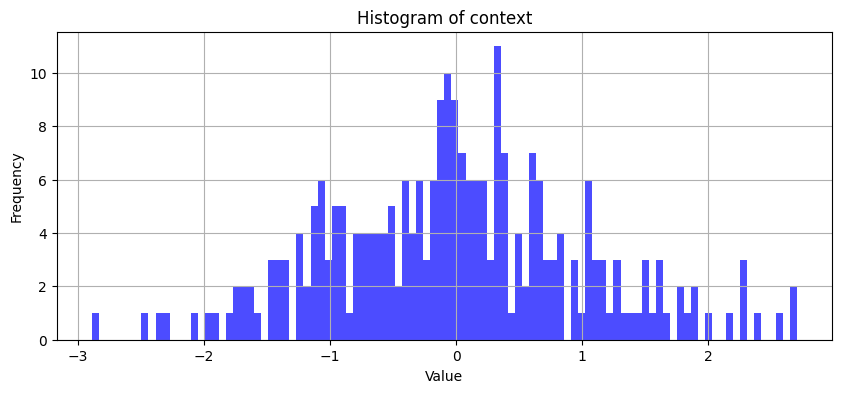


Analysis for batch:
 - batch is an integer tensor with values ranging from 0 to 0
serialized_depth contains non-tensor data or unsupported type: 10

Analysis for serialized_code:
 - serialized_code is an integer tensor with values ranging from 19154514 to 1071082666

Analysis for serialized_order:
 - serialized_order is an integer tensor with values ranging from 0 to 99999

Analysis for serialized_inverse:
 - serialized_inverse is an integer tensor with values ranging from 0 to 99999
sparse_shape contains non-tensor data or unsupported type: [871, 374, 159]
sparse_conv_feat contains non-tensor data or unsupported type: SparseConvTensor[shape=torch.Size([100000, 48])]
***********************************************************************************************************************************************************************************************************************************************************************************************************************************

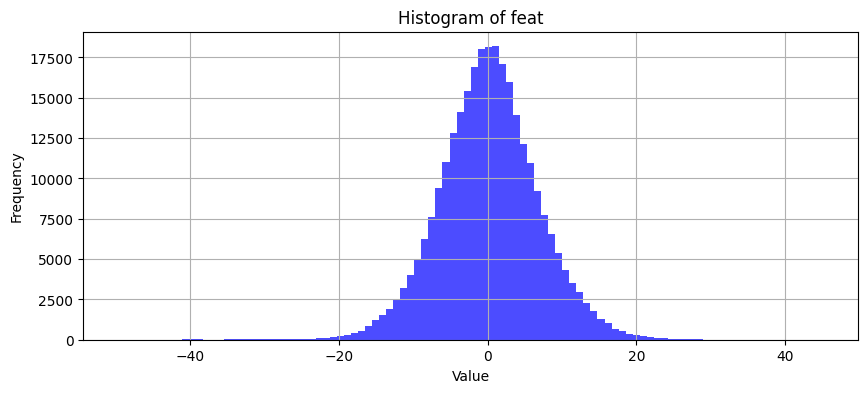


Analysis for coord:
 - Contains NaN: False
 - Contains Inf: False
 - Min value: -8.254451751708984
 - Max value: 8.243521690368652
 - Mean value: 0.441673219203949


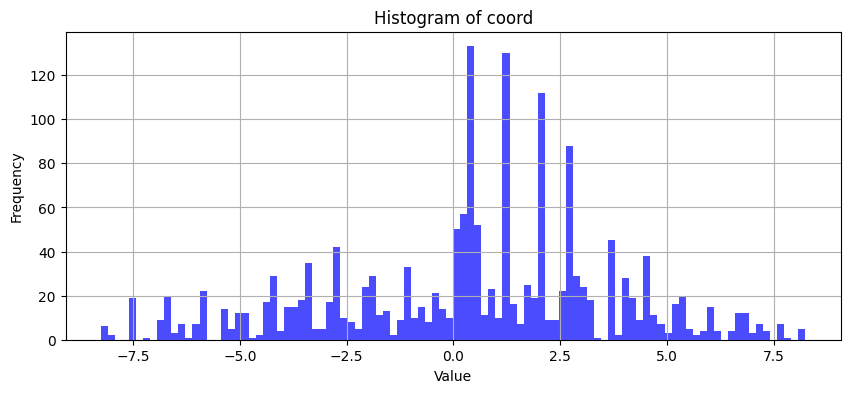


Analysis for grid_coord:
 - grid_coord is an integer tensor with values ranging from 0 to 48

Analysis for serialized_code:
 - serialized_code is an integer tensor with values ranging from 4676 to 261494

Analysis for serialized_order:
 - serialized_order is an integer tensor with values ranging from 0 to 564

Analysis for serialized_inverse:
 - serialized_inverse is an integer tensor with values ranging from 0 to 564
serialized_depth contains non-tensor data or unsupported type: 6

Analysis for batch:
 - batch is an integer tensor with values ranging from 0 to 0
condition contains non-tensor data or unsupported type: ['Heritage']

Analysis for context:
 - Contains NaN: False
 - Contains Inf: False
 - Min value: -2.884572744369507
 - Max value: 2.6998097896575928
 - Mean value: -0.006473422050476074


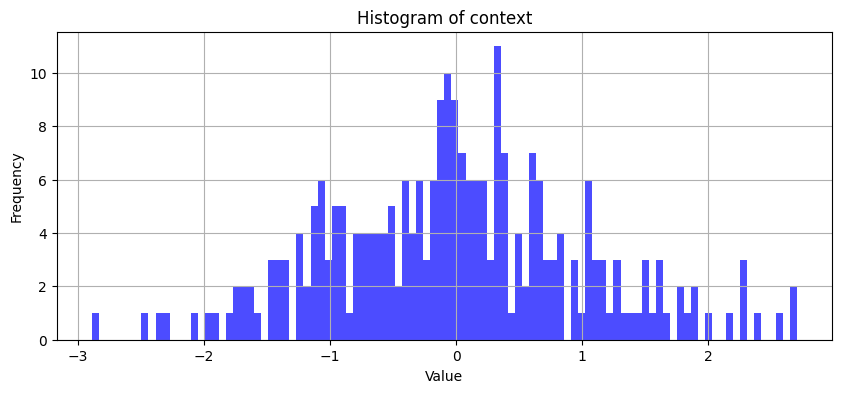


Analysis for pooling_inverse:
 - pooling_inverse is an integer tensor with values ranging from 0 to 564
pooling_parent contains non-tensor data or unsupported type: {'feat': tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]], device='cuda:0',
       requires_grad=True), 'coord': tensor([[-6.9256, -5.8174,  0.0178],
        [-5.1240, -6.8175,  0.0130],
        [-4.9135, -6.8160,  0.2062],
        ...,
        [ 2.3598,  6.5895,  0.6471],
        [ 1.8563,  6.6365,  0.6139],
        [ 1.8323,  6.6200,  0.2501]], device='cuda:0'), 'grid_coord': tensor([[58,  3,  0],
        [62,  0,  0],
        [63,  0,  0],
        ...,
        [81, 34,  1],
        [80, 34,  1],
        [80, 34,  0]], device='cuda:0'), 'serialized_code': tensor([[ 149554,  149792,  14

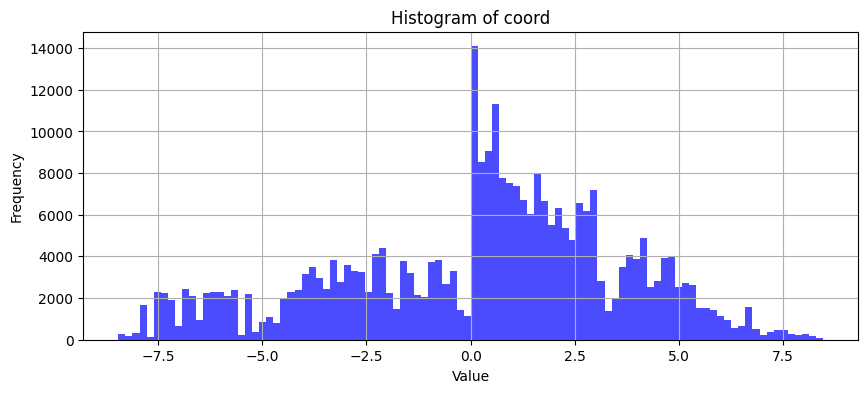


Analysis for grid_coord:
 - grid_coord is an integer tensor with values ranging from 0 to 775

Analysis for segment:
 - segment is an integer tensor with values ranging from 1 to 13
condition contains non-tensor data or unsupported type: ['Heritage']

Analysis for offset:
 - offset is an integer tensor with values ranging from 100000 to 100000

Analysis for feat:
 - Contains NaN: True
 - Contains Inf: False
 - Skipped plotting for feat due to NaNs/Infs.

Analysis for context:
 - Contains NaN: False
 - Contains Inf: False
 - Min value: -2.884572744369507
 - Max value: 2.6998097896575928
 - Mean value: -0.006473422050476074


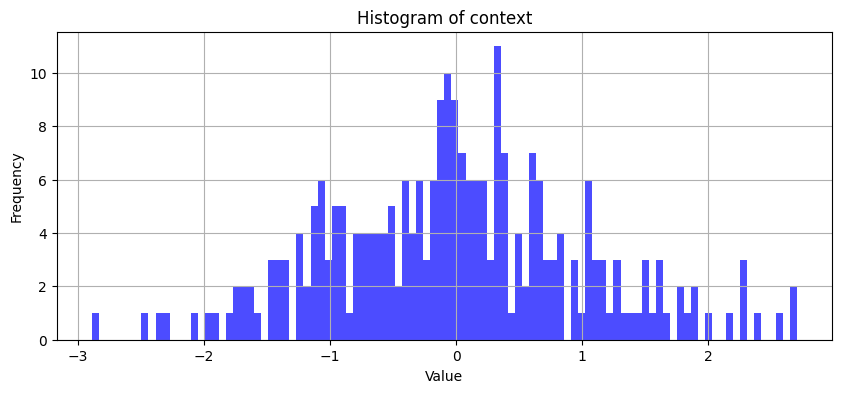


Analysis for batch:
 - batch is an integer tensor with values ranging from 0 to 0
serialized_depth contains non-tensor data or unsupported type: 10

Analysis for serialized_code:
 - serialized_code is an integer tensor with values ranging from 19154514 to 1071082666

Analysis for serialized_order:
 - serialized_order is an integer tensor with values ranging from 0 to 99999

Analysis for serialized_inverse:
 - serialized_inverse is an integer tensor with values ranging from 0 to 99999
sparse_shape contains non-tensor data or unsupported type: [871, 374, 159]
sparse_conv_feat contains non-tensor data or unsupported type: SparseConvTensor[shape=torch.Size([100000, 64])]

Analysis for pad:
 - pad is an integer tensor with values ranging from 0 to 99999

Analysis for unpad:
 - unpad is an integer tensor with values ranging from 0 to 99999

Analysis for cu_seqlens_key:
 - cu_seqlens_key is an integer tensor with values ranging from 0 to 100352


In [3]:
files_to_process = [
    '../point_before_serialization.pkl',
    '../point_before_embedding.pkl',
    '../point_before_encoding.pkl',
    '../point_before_decoding.pkl',
    '../point_after_decoding.pkl'
]

# Run diagnostics on each file
for file_name in files_to_process:
    print("*"*500)
    process_point_file(file_name)
